In [1]:
import skimage.draw as skd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import pandas
import os
from scipy import misc

%matplotlib inline
fig_size = (12, 9)
#fig_size[0] = 12
#fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [2]:
boxes = pandas.read_json('whale_faces_Vinh.json')

In [3]:
boxes.columns

Index([u'annotations', u'class', u'filename'], dtype='object')

In [4]:
boxes.annotations[0]

[{u'class': u'Head',
  u'height': 661.4783999999997,
  u'type': u'rect',
  u'width': 825.2927999999999,
  u'x': 340.0703999999999,
  u'y': 659.4047999999998}]

In [5]:
for _, fn in enumerate(boxes.filename):
    fname = 'imgs_subset/' + fn.split('/')[-1]
    if not os.path.isfile(fname):
        continue
    img = misc.imread(fname)
    coords = boxes.annotations[_][0]
    break
        

In [7]:
imgs = []
for fn in boxes.filename:
    fname = 'imgs/' + fn.split('/')[-1]
    if os.path.isfile(fname):
        imgs.append(fn)
print len(imgs)

4544


In [7]:
coords

{u'class': u'Head',
 u'height': 663.9725399728379,
 u'type': u'rect',
 u'width': 826.1808152105023,
 u'x': 2128.172571118152,
 u'y': 1786.4538046174732}

In [8]:
np.mean(img,axis=(0,1))

array([ 42.82220992,  68.93019448,  75.63732653])

In [12]:
def drawbox(img, x, y, h, w):
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    print x, y, w, h
    rr, cc = skd.line(x - w/2, y - h/2, x - w/2, y + h/2)
    img[rr,cc,:] = 255
    rr, cc = skd.line(x + w/2, y - h/2, x + w/2, y + h/2)
    img[rr,cc,:] = 255
    rr, cc = skd.line(x - w/2, y + h/2, x + w/2, y + h/2)
    img[rr,cc,:] = 255
    rr, cc = skd.line(x - w/2, y - h/2, x + w/2, y - h/2)
    img[rr,cc,:] = 255


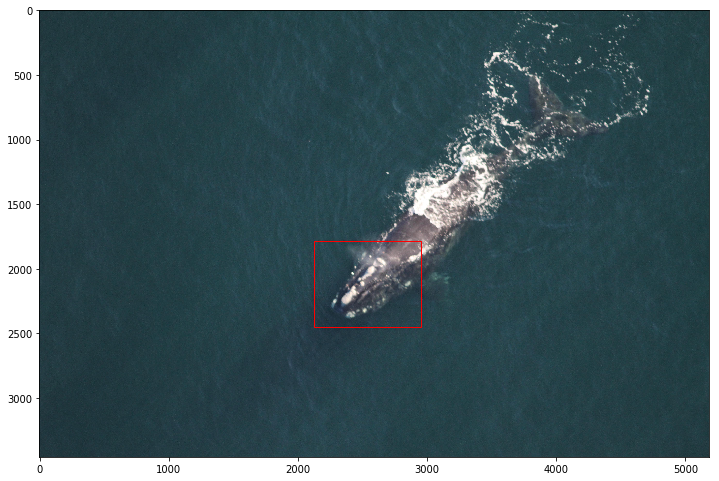

In [13]:
def drawbox2(x, y, w, h):
    rect = patches.Rectangle((x,y), w, h, edgecolor='r', facecolor='none')
    return rect

plt.clf()
fig, ax = plt.subplots(1)
ax.imshow(img)
ax.add_patch(drawbox2(coords['x'], coords['y'], coords['width'], coords['height']))
plt.show()
#plt.savefig('1.png', dpi=1024)

In [14]:
print img.shape
w = np.mean(img, axis=2)
print w.shape
#plt.imshow(w)
#plt.show()
print np.max(w)
X = np.arange(0, w.shape[1])
Y = np.arange(0, w.shape[0])
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
print w.shape, X.shape, Y.shape
surf = ax.plot_surface(X, Y, w)

(3456, 5184, 3)
(3456, 5184)
255.0


ValueError: Unknown projection '3d'

In [ ]:
img[1715,1456,:]

In [ ]:
img[1715,:,:]